# Lecture 9.2: Dates
<div style="border: 1px double black; padding: 10px; margin: 10px">

**After today's lecture you will understand:**
* Learn how to deal with dates 
</div>

This correpsonds to Chapter 16 of your book



    




In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Dates
Most of us have a pretty firm grasp on dates. But they can be more complicated than you might think. For instance,  does every year have 365 days?

As before, we'll rely on the `lubridate` package to work with dates:

In [2]:
library(lubridate)
library(tidyverse)
library(nycflights13)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




There are three different date classes in R:

* A date, printed in tibble as `<date>`, represents a full day on the calendar.
* A time within a day, printed as `<time>`, represents a specific time within an (unspecified) day.
* A date-time is a date plus a time (tibble: `<dttm>`). A date-time uniquely identifies an instant in time (up to a given precision, usually 1 second.)

We've already seen examples of date-times in the `flights` tibble:

In [3]:
select(flights, time_hour) %>% print

# A tibble: 336,776 × 1
   time_hour          
   <dttm>             
 1 2013-01-01 05:00:00
 2 2013-01-01 05:00:00
 3 2013-01-01 05:00:00
 4 2013-01-01 05:00:00
 5 2013-01-01 06:00:00
 6 2013-01-01 05:00:00
 7 2013-01-01 06:00:00
 8 2013-01-01 06:00:00
 9 2013-01-01 06:00:00
10 2013-01-01 06:00:00
# … with 336,766 more rows


You should tend to favor working with dates over date-times if possible. The latter are more complicated because of the need to handle time zones.



We can get the current date and date-time using the `today()` and `now()` commands:

In [4]:
today()

[1] "2021-11-01"

In [5]:
now()

[1] "2021-11-01 11:53:52 EDT"

### Converting strings to dates and times
Frequently you will be encounter date and/or time data stored as text. You will need to convert these data into the native R date classes in order to use date functions on them. The `mdy/ymd/dmy` functions accomplish this.

In [6]:
ymd("2017 01 31")

[1] "2017-01-31"

In [7]:
mdy("1 31 2017")

dmy("31 1 2017")

[1] "2017-01-31"

[1] "2017-01-31"

### Other languages
You might find yourself needing to parse dates in other languages. This will fail if the dates are in a language which is different from your system's language:

In [8]:
dmy("31 août 2017")

Warning message:
“All formats failed to parse. No formats found.”


[1] NA

Fix this by specifying the *locale* option:

In [9]:
dmy("31 août 2017", locale = "fr_FR")

[1] "2017-08-31"

In [10]:
dmy("31-Jan-2017")

[1] "2017-01-31"

### Date-time parsers
There are also equivalent functions for parsing date-times:

In [11]:
ymd_hms("2017-01-31 20:11:59")

[1] "2017-01-31 20:11:59 UTC"

In [12]:
mdy_hm("01/31/2017 08:01")

[1] "2017-01-31 08:01:00 UTC"

Sometimes you can get away with calling `as_datetime()`:

In [13]:
as_datetime("2017-01-31 20:11:59")
as_datetime("01/31/2017 08:01")

[1] "2017-01-31 20:11:59 UTC"

Warning message:
“All formats failed to parse. No formats found.”


[1] NA

### Making a date-time from components
We saw in the `flights` table that date information can be spread across multiple columns. The `make_date` and `make_datetime` functions can make dates from these:

In [14]:
flights %>% select(year, month, day, dep_time) %>% print

# A tibble: 336,776 × 4
    year month   day dep_time
   <int> <int> <int>    <int>
 1  2013     1     1      517
 2  2013     1     1      533
 3  2013     1     1      542
 4  2013     1     1      544
 5  2013     1     1      554
 6  2013     1     1      554
 7  2013     1     1      555
 8  2013     1     1      557
 9  2013     1     1      557
10  2013     1     1      558
# … with 336,766 more rows


#### Example
The `flights` table has scheduled as well as actual arrival and departure times. Let's create a date-time variable from the actual departure time:

In [15]:
make_datetime_100 = function(year, month, day, time) {
  make_datetime(year, month, day, time %/% 100, time %% 100)
}

In [16]:
flights_dt = flights %>% 
  filter(!is.na(dep_time), !is.na(arr_time)) %>% 
  mutate(
    dep_time = make_datetime_100(year, month, day, dep_time),
    arr_time = make_datetime_100(year, month, day, arr_time),
    sched_dep_time = make_datetime_100(year, month, day, sched_dep_time),
    sched_arr_time = make_datetime_100(year, month, day, sched_arr_time)
  ) %>% 
  select(origin, dest, ends_with("delay"), ends_with("time"))  %>% print

# A tibble: 328,063 × 9
   origin dest  dep_delay arr_delay dep_time            sched_dep_time     
   <chr>  <chr>     <dbl>     <dbl> <dttm>              <dttm>             
 1 EWR    IAH           2        11 2013-01-01 05:17:00 2013-01-01 05:15:00
 2 LGA    IAH           4        20 2013-01-01 05:33:00 2013-01-01 05:29:00
 3 JFK    MIA           2        33 2013-01-01 05:42:00 2013-01-01 05:40:00
 4 JFK    BQN          -1       -18 2013-01-01 05:44:00 2013-01-01 05:45:00
 5 LGA    ATL          -6       -25 2013-01-01 05:54:00 2013-01-01 06:00:00
 6 EWR    ORD          -4        12 2013-01-01 05:54:00 2013-01-01 05:58:00
 7 EWR    FLL          -5        19 2013-01-01 05:55:00 2013-01-01 06:00:00
 8 LGA    IAD          -3       -14 2013-01-01 05:57:00 2013-01-01 06:00:00
 9 JFK    MCO          -3        -8 2013-01-01 05:57:00 2013-01-01 06:00:00
10 LGA    ORD          -2         8 2013-01-01 05:58:00 2013-01-01 06:00:00
# … with 328,053 more rows, and 3 more variables: arr_time <dttm

In [17]:
flights %>% select((dep_time))%>%print

# A tibble: 336,776 × 1
   dep_time
      <int>
 1      517
 2      533
 3      542
 4      544
 5      554
 6      554
 7      555
 8      557
 9      557
10      558
# … with 336,766 more rows


Now we can use built in R command to query and plot these data based on actual departure time:

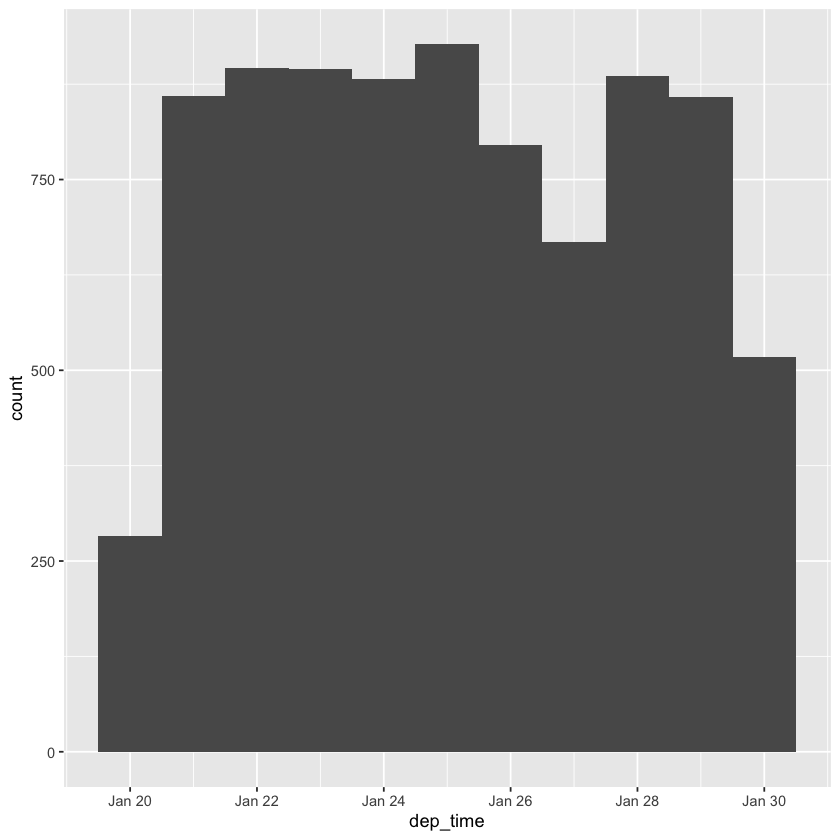

In [18]:
flights_dt %>% 
  filter(dep_time < ymd(20130130), dep_time >= ymd(20130120)) %>% 
  ggplot(aes(x=dep_time)) + 
  geom_histogram(binwidth = 24 * 60 * 60)

Notice that this command and resulting graph looks much nicer than if we did not use the date classes:
* The filter on `dep_time` looks more natural than `filter(day<2, month==1, year==2013)`.
* We can easily express the bin-width of 600 seconds in `geom_freqpoly(binwidth = 600)`. When you use date-times in a numeric context (like in a histogram), 1 means 1 second; for dates, 1 means 1 day.
* The plot x axis has nice readable labels.

### The epoch
UNIX systems sometimes represent time as "the number of seconds which have elapsed since 1-1-1970." This date is known as "the epoch". So you may occasionally come across date-times that look like:

In [19]:
now() %>% as.integer() 

[1] 1635782035

To convert these to date format you can use `as_datetime`:

In [20]:
as_datetime(3600 * 24)

[1] "1970-01-02 UTC"

### Exercise
Alice was born on August 1, 1999. How many seconds old is Alice? (To the nearest million, say).

In [21]:
a <- now() %>% as.integer
b <- mdy_hms("August 1, 1999 00:00:00") %>% as.integer

a - b

[1] 702316436

### Date-time components
The functions `year()`, `month()`, `mday()` (day of the month), `yday()` (day of the year), `wday()` (day of the week), `hour()`, `minute()`, and `second()` can extract components from dates and times:

In [22]:
mdy_hms(c("March 12, 2018 12:00:00")) 

[1] "2018-03-12 12:00:00 UTC"

By extracting the minute component of scheduled departure time, we uncover a surprising pattern:

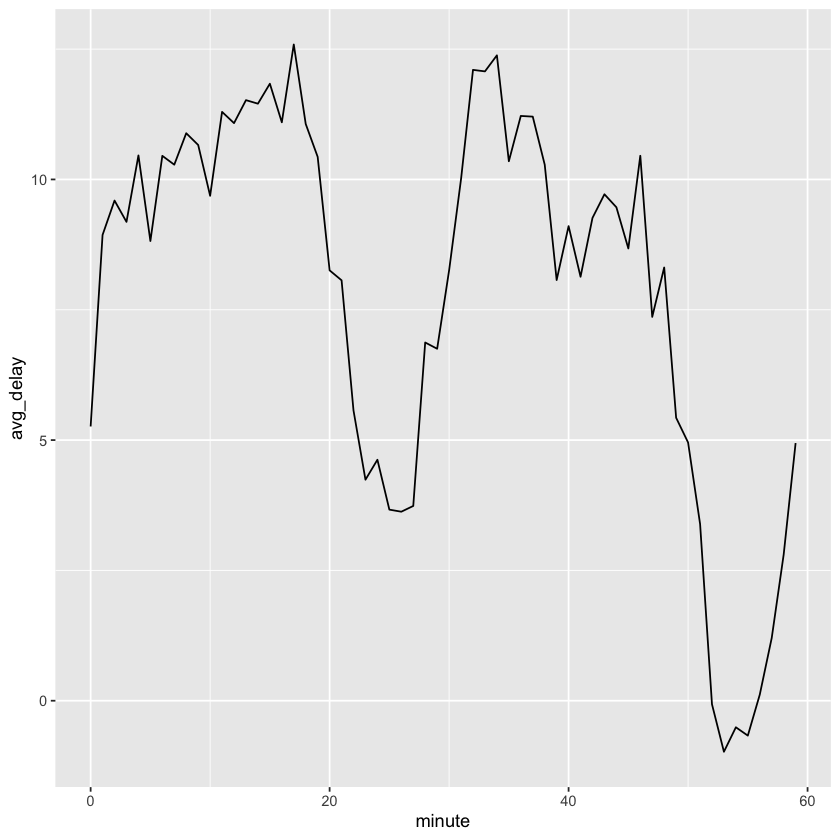

In [23]:
flights_dt %>% 
  mutate(minute = minute(dep_time)) %>% 
  group_by(minute) %>% 
  summarise(
    avg_delay = mean(arr_delay, na.rm = TRUE),
    n = n()) %>% 
  ggplot(aes(minute, avg_delay)) +
    geom_line()

On the other hand, when grouped by scheduled departure time the delays seem to be random:

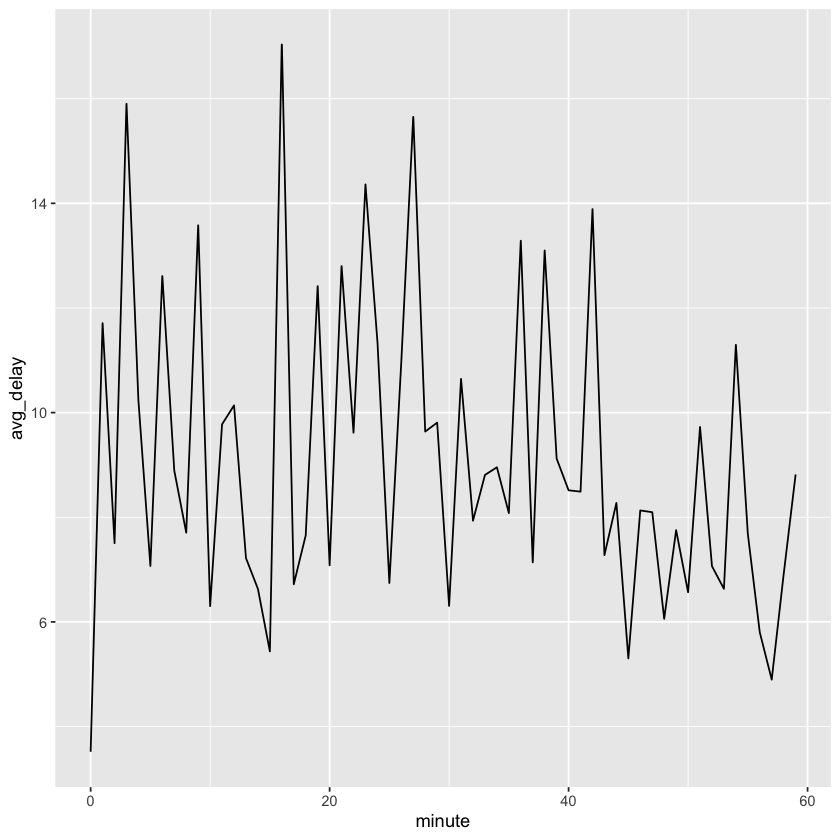

In [24]:
sched_dep <- flights_dt %>% 
  mutate(minute = minute(sched_dep_time)) %>% 
  group_by(minute) %>% 
  summarise(
    avg_delay = mean(arr_delay, na.rm = TRUE),
    n = n())

ggplot(sched_dep, aes(minute, avg_delay)) +
  geom_line()

As explained by the book, there is a bias in scheduled departure times towards nice round numbers:

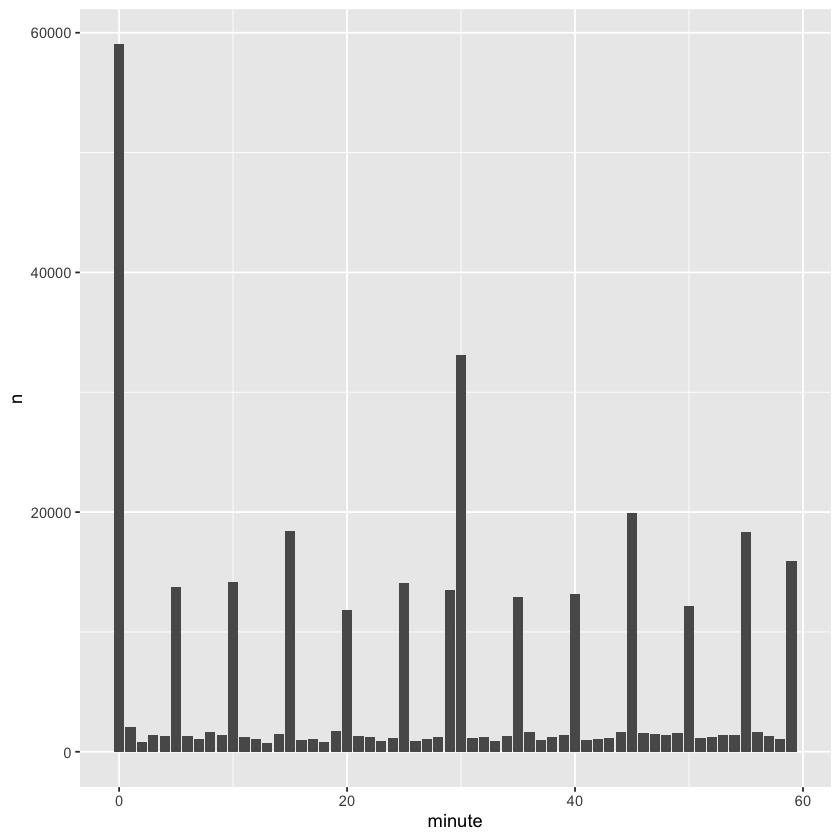

In [25]:
ggplot(sched_dep, aes(minute, n)) + geom_col()

#### As accessors
The component functions also work as accessors, meaning they can be used on the left-hand side of an assignment:

In [26]:
(d = today())
mday(d) = 24
d

[1] "2021-11-01"

[1] "2021-11-24"

To return a new (date)time rather than modifying in place, you can use the `update` command:

In [27]:
update(today(), year=2020)

[1] "2020-11-01"

### Time spans
Time spans are the difference between two time points. These are represented in R by the `difftime` class:

In [28]:
(d = today() - update(today(), year=2010))
class(d)

Time difference of 4018 days

[1] "difftime"

Because it is usually simpler to reason about time differences in terms of a single number, `lubridate` also provides a `duration` class which is stored in terms of seconds:

In [29]:
as.duration(1234)

[1] "1234s (~20.57 minutes)"

In [30]:
dseconds(10)

[1] "10s"

In [31]:
dweeks(3)

[1] "1814400s (~3 weeks)"

Arithmetic with durations works as you would expect:

In [32]:
2 * dyears(1)

[1] "63115200s (~2 years)"

In [33]:
dyears(1) + dweeks(12) + dhours(15)

[1] "38869200s (~1.23 years)"

You have to be careful when adding durations and dates. What is 1 day after October 31st at 1pm?

In [34]:
next_saturday = mdy_hm("Oct. 31, 2020 13:00PM", tz="America/Detroit")
next_saturday + ddays(1)

[1] "2020-11-01 12:00:00 EST"

To prevent this sort of thing from happening, `lubridate` also offers objects called "periods":

In [35]:
days(1)
class(days(1))

[1] "1d 0H 0M 0S"

[1] "Period"
attr(,"package")
[1] "lubridate"

Similarly, periouds have the expected behaviour if you add one year to a leap year:

In [36]:
ymd("2016-01-01") + dyears(1)

[1] "2016-12-31 06:00:00 UTC"

In [37]:
ymd("2016-01-01") + years(1)

[1] "2017-01-01"

### Exercise
Jack is 20,000 days old today. What is Jack's birthday?

In [38]:
today() - ddays(20000)

[1] "1967-01-29"

#### Example
Earlier in the semester we saw how some flights seem to have arrived before they departed:

In [39]:
filter(flights, arr_time < dep_time) %>% head %>% print

# A tibble: 6 × 19
   year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
  <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
1  2013     1     1     1929           1920         9        3              7
2  2013     1     1     1939           1840        59       29           2151
3  2013     1     1     2058           2100        -2        8           2359
4  2013     1     1     2102           2108        -6      146            158
5  2013     1     1     2108           2057        11       25             39
6  2013     1     1     2120           2130       -10       16             18
# … with 11 more variables: arr_delay <dbl>, carrier <chr>, flight <int>,
#   tailnum <chr>, origin <chr>, dest <chr>, air_time <dbl>, distance <dbl>,
#   hour <dbl>, minute <dbl>, time_hour <dttm>


This is because these are overnight flights. To fix this, we can now simply add one day to `arr_time`:

In [40]:
flights_dt = flights_dt %>% 
  mutate(
    overnight = arr_time < dep_time,
    arr_time = arr_time + days(overnight * 1),
    sched_arr_time = sched_arr_time + days(overnight * 1)
  ) %>% print

# A tibble: 328,063 × 10
   origin dest  dep_delay arr_delay dep_time            sched_dep_time     
   <chr>  <chr>     <dbl>     <dbl> <dttm>              <dttm>             
 1 EWR    IAH           2        11 2013-01-01 05:17:00 2013-01-01 05:15:00
 2 LGA    IAH           4        20 2013-01-01 05:33:00 2013-01-01 05:29:00
 3 JFK    MIA           2        33 2013-01-01 05:42:00 2013-01-01 05:40:00
 4 JFK    BQN          -1       -18 2013-01-01 05:44:00 2013-01-01 05:45:00
 5 LGA    ATL          -6       -25 2013-01-01 05:54:00 2013-01-01 06:00:00
 6 EWR    ORD          -4        12 2013-01-01 05:54:00 2013-01-01 05:58:00
 7 EWR    FLL          -5        19 2013-01-01 05:55:00 2013-01-01 06:00:00
 8 LGA    IAD          -3       -14 2013-01-01 05:57:00 2013-01-01 06:00:00
 9 JFK    MCO          -3        -8 2013-01-01 05:57:00 2013-01-01 06:00:00
10 LGA    ORD          -2         8 2013-01-01 05:58:00 2013-01-01 06:00:00
# … with 328,053 more rows, and 4 more variables: arr_time <dtt

### Time zones
When we create a date-time, the default time zone is "UTC":

In [41]:
ymd_hm("2000-01-30 00:00")

[1] "2000-01-30 UTC"

This is a standard time zone which is, for historical reasons, equal to time in Greenwich, England.

If your times are coming from a different time zone you must specify using the `tz=` option:

In [42]:
ymd_hms("2017-6-30 20:11:59", tz="America/Detroit")
ymd_hms("2017-6-30 20:11:59", tz="America/Los_Angeles")

[1] "2017-06-30 20:11:59 EDT"

[1] "2017-06-30 20:11:59 PDT"

In [43]:
Sys.timezone()

[1] "America/Detroit"

The command `OlsonNames()` will list all the possible time zones:

In [44]:
length(OlsonNames())
sample(OlsonNames(), 10)

[1] 594

[1] "UTC"              "Asia/Ho_Chi_Minh" "US/Michigan"      "America/Denver"  
 [5] "Europe/Lisbon"    "Asia/Samarkand"   "Australia/Hobart" "Etc/GMT+0"       
 [9] "America/Barbados" "Indian/Kerguelen"